In [5]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6
import seaborn as sb
sb.set()

In [27]:
gld = pd.DataFrame(pdr.get_data_yahoo('GLD')['Close'])

In [3]:
dji.head()

,Close
Date,
2017-10-09,122.080002
2017-10-10,122.400002
2017-10-11,122.790001
2017-10-12,122.889999
2017-10-13,123.820000


In [17]:
ma = 21
gld['returns'] = np.log(gld["Close"]).diff()
gld['ma'] = gld['Close'].rolling(ma).mean()
gld['ratio'] = gld['Close'] / gld['ma']

In [18]:
gld['ratio'].describe()

count    1239.000000
mean        1.002149
std         0.021088
min         0.915509
25%         0.989465
50%         1.001136
75%         1.014959
max         1.087576
Name: ratio, dtype: float64

In [19]:
percentiles=[5,10,50,90,95]
p = np.percentile(gld['ratio'].dropna(),percentiles)

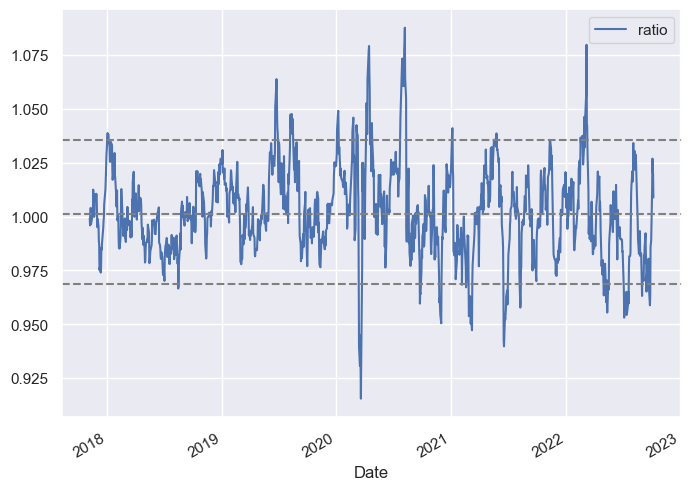

In [20]:
gld['ratio'].dropna().plot(legend=True)
plt.axhline(p[0],c=(.5,.5,.5), ls='--')
plt.axhline(p[2],c=(.5,.5,.5), ls='--')
plt.axhline(p[-1],c=(.5,.5,.5), ls='--')

In [21]:
short = p[-1]
long = p[0]
gld['position'] = np.where(gld.ratio > short, -1, np.nan)
gld['position'] = np.where(gld.ratio < long, 1, gld['position'])
gld['position'] = gld['position'].ffill()

<AxesSubplot:xlabel='Date'>

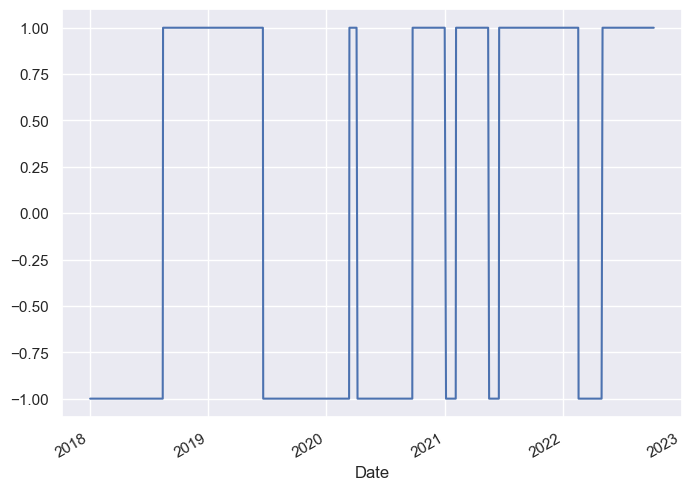

In [22]:
gld.position.dropna().plot()

In [23]:
gld['strat_return'] = gld['returns'] * gld['position'].shift()

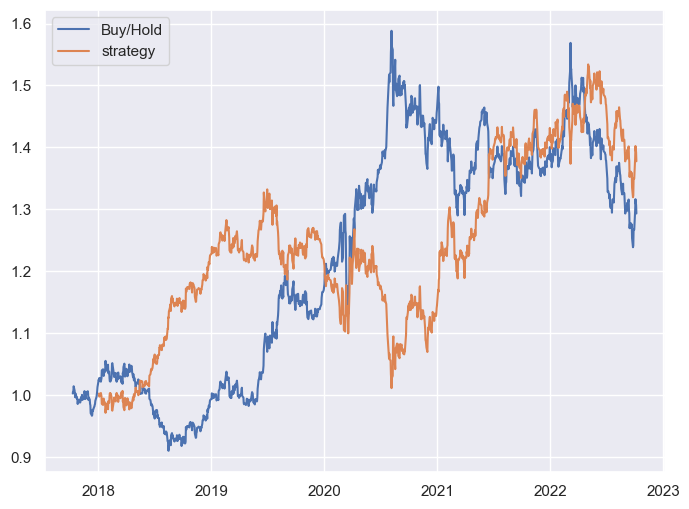

In [24]:
plt.plot(np.exp(gld['returns'].dropna()).cumprod(),label='Buy/Hold')
plt.plot(np.exp(gld['strat_return'].dropna()).cumprod(),label='strategy')
plt.legend();

In [25]:
print(np.exp(gld['returns'].dropna()).cumprod()[-1]-1)
print(np.exp(gld['strat_return'].dropna()).cumprod()[-1] -1)

0.2932503482536042
0.3775597745019994
